In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

# Distance Measurements

In [34]:
N = 5

distance = np.zeros((N, N))
distance[0, 1] = 108
distance[0, 2] = 150
distance[0, 3] = 74
distance[0, 4] = 88
distance[1, 2] = 60
distance[1, 3] = 95
distance[1, 4] = 50
distance[2, 3] = 105
distance[2, 4] = 63
distance[3, 4] = 47

distance

array([[  0., 108., 150.,  74.,  88.],
       [  0.,   0.,  60.,  95.,  50.],
       [  0.,   0.,   0., 105.,  63.],
       [  0.,   0.,   0.,   0.,  47.],
       [  0.,   0.,   0.,   0.,   0.]])

## Distances are symmetrical, therefore the matrix should be as well

In [35]:
distance = distance + distance.T
distance

array([[  0., 108., 150.,  74.,  88.],
       [108.,   0.,  60.,  95.,  50.],
       [150.,  60.,   0., 105.,  63.],
       [ 74.,  95., 105.,   0.,  47.],
       [ 88.,  50.,  63.,  47.,   0.]])

## Random Initial Points

In [36]:
scale = np.max(distance)
initial_coords = np.random.random((N, 2)) * scale  # 2 for the x, y coords
initial_coords

array([[ 34.77598393, 125.84722528],
       [ 72.9920475 ,   0.89177744],
       [ 82.34556047, 135.60702563],
       [ 51.43970445, 108.23199689],
       [ 36.35991227,  60.14654148]])

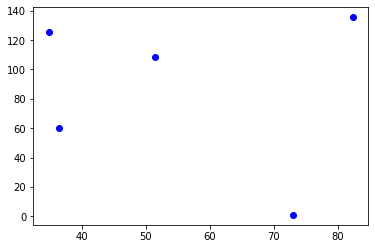

In [37]:
plt.plot(initial_coords[:, 0], initial_coords[:, 1], "bo")
plt.show()

# Error of the random initial guess
- 5x5 matrix
- Automatic broadcasting
- Columns are: x0 - x0, x0 - x1, x0 - x2, etc.

In [38]:
x_diff = initial_coords[:, 0, np.newaxis] - initial_coords[:, 0]
x_diff

array([[  0.        , -38.21606357, -47.56957654, -16.66372052,
         -1.58392834],
       [ 38.21606357,   0.        ,  -9.35351298,  21.55234304,
         36.63213522],
       [ 47.56957654,   9.35351298,   0.        ,  30.90585602,
         45.9856482 ],
       [ 16.66372052, -21.55234304, -30.90585602,   0.        ,
         15.07979218],
       [  1.58392834, -36.63213522, -45.9856482 , -15.07979218,
          0.        ]])

In [39]:
y_diff = initial_coords[:, 1, np.newaxis] - initial_coords[:, 1]
y_diff

array([[   0.        ,  124.95544784,   -9.75980035,   17.61522839,
          65.7006838 ],
       [-124.95544784,    0.        , -134.71524819, -107.34021945,
         -59.25476404],
       [   9.75980035,  134.71524819,    0.        ,   27.37502874,
          75.46048415],
       [ -17.61522839,  107.34021945,  -27.37502874,    0.        ,
          48.08545541],
       [ -65.7006838 ,   59.25476404,  -75.46048415,  -48.08545541,
           0.        ]])

In [40]:
d = np.sqrt(x_diff**2 + y_diff**2)
err = np.sum((d - distance) ** 2)
err

49434.70174365972

## Now minimize this distance error

In [41]:
def err_fun(x):
    coords = x.reshape((N, 2))
    x = coords[:, 0, np.newaxis] - coords[:, 0]
    y_diff = coords[:, 1, np.newaxis] - coords[:, 1]
    d = np.sqrt(x_diff**2 + y_diff**2)
    err = np.sum((d - distance) ** 2)
    return err

In [42]:
err_fun(initial_coords)

49434.70174365972

In [43]:
# Function to minimize, variables to minimize
result = minimize(err_fun, initial_coords.flatten())
result

      fun: 4184.9429942945135
 hess_inv: array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.23934584, 0.        , 0.17907299, 0.        ,
        0.19679002, 0.        , 0.24609841, 0.        , 0.20188802],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.17907299, 0.        , 0.24226269, 0.        ,
        0.19641706, 0.        , 0.25972061, 0.        , 0.18217787],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.19679002, 0.        , 0.19641706, 0.        ,
        0.26703111, 0.        , 0.26277663, 0.        , 0.20883321],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],


In [45]:
# Final x, y coordinates
final_coords = result.x.reshape((N, 2))
final_coords

array([[ 34.77598393, 166.77851663],
       [ 72.9920475 ,  54.62552746],
       [ 82.34556047,  15.85828392],
       [ 51.43970445, 119.24654279],
       [ 36.35991227,  74.27390616]])

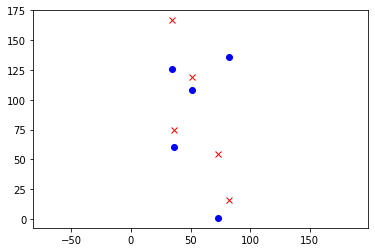

In [47]:
plt.plot(initial_coords[:, 0], initial_coords[:, 1], "bo")
plt.plot(final_coords[:, 0], final_coords[:, 1], "rx")
plt.axis("Equal")  # Force x, y axes to have the same scaling
plt.show()